In [3]:
Business Problem Statement:
    
1. To create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
        

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Load the dataset

df=pd.read_csv("C:/Users/DELL/Downloads/aerofit_treadmill.csv")

In [6]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
# Ques-1:Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [7]:
#To see the first few rows of the dataset 
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [8]:
#To see the last few rows of the dataset
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [6]:
# Get a concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
#To get descriptive ststistics of the numeric column
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [10]:
#To check the number of missing values in each column
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
#To check the adat type of each column
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
# Ques-1:Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [12]:
#Observation of the shape of data
df.shape

(180, 9)

In [13]:
df["Product"]=df["Product"].astype("category")
df["Gender"]=df["Gender"].astype("category")
df["MaritalStatus"]=df["MaritalStatus"].astype("category")
("Data_Type:",df.dtypes)

('Data_Type:',
 Product          category
 Age                 int64
 Gender           category
 Education           int64
 MaritalStatus    category
 Usage               int64
 Fitness             int64
 Income              int64
 Miles               int64
 dtype: object)

In [14]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [15]:
# Ques-2: Non-Graphical Analysis: Value counts and unique attributes

In [16]:
Product_counts=df["Product"].value_counts()
Product_counts

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [17]:
Gender_counts=df["Gender"].value_counts()
Gender_counts

Male      104
Female     76
Name: Gender, dtype: int64

In [18]:
MaritalStatus_counts=df["MaritalStatus"].value_counts()
MaritalStatus_counts

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [19]:
#To check the number of unique values in each column
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [20]:
# Ques-3: Visual Analysis - Univariate & Bivariate

In [21]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


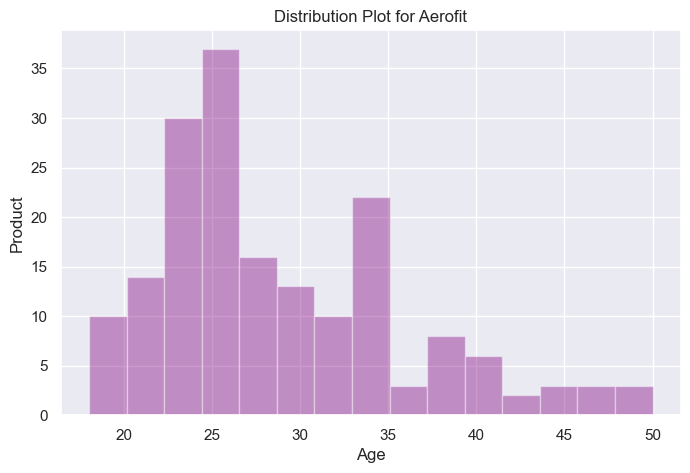

In [22]:
# Create a distribution Plot
plt.figure(figsize=(8,5))
sns.set(style="darkgrid")
sns.distplot(df['Age'],bins=15,kde=False,color="purple")
plt.xlabel('Age')
plt.ylabel('Product')
plt.title('Distribution Plot for Aerofit')
plt.show()

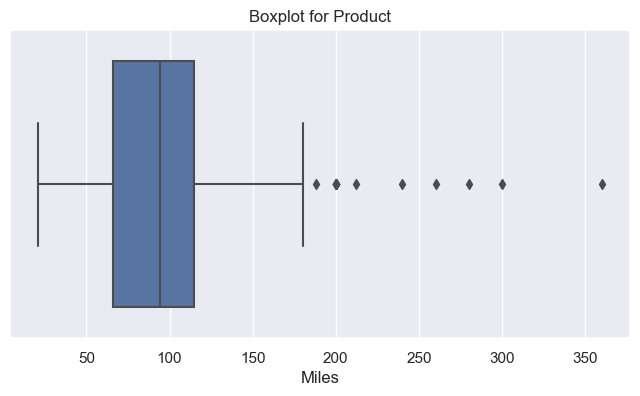

In [23]:
# Create a boxplot(#Detect the outlier)
plt.figure(figsize=(8,4))
sns.boxplot(x="Miles",data=df)
plt.title("Boxplot for Product")
plt.show()

In [24]:
#Calculate mean and median
mean=df.mean()
mean

C:\Users\DELL\AppData\Local\Temp\ipykernel_10756\2298417998.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean()


Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [25]:
median=df.median()
median

C:\Users\DELL\AppData\Local\Temp\ipykernel_10756\3892995489.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median=df.median()


Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [26]:
# Calculate the difference between mean and median
difference=mean-median
difference

Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64

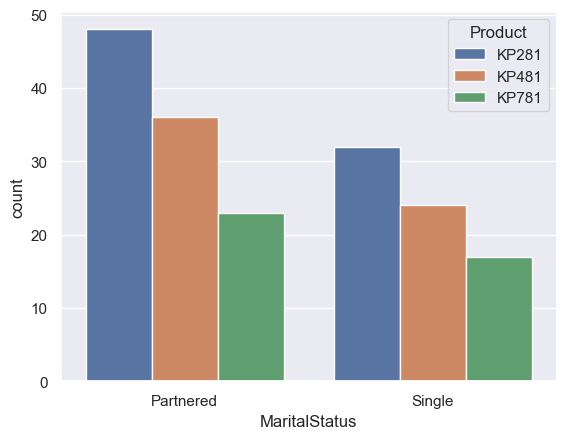

In [27]:
#Countplot
sns.set_style("darkgrid")
sns.countplot(x='MaritalStatus',hue='Product',data=df)
plt.show()

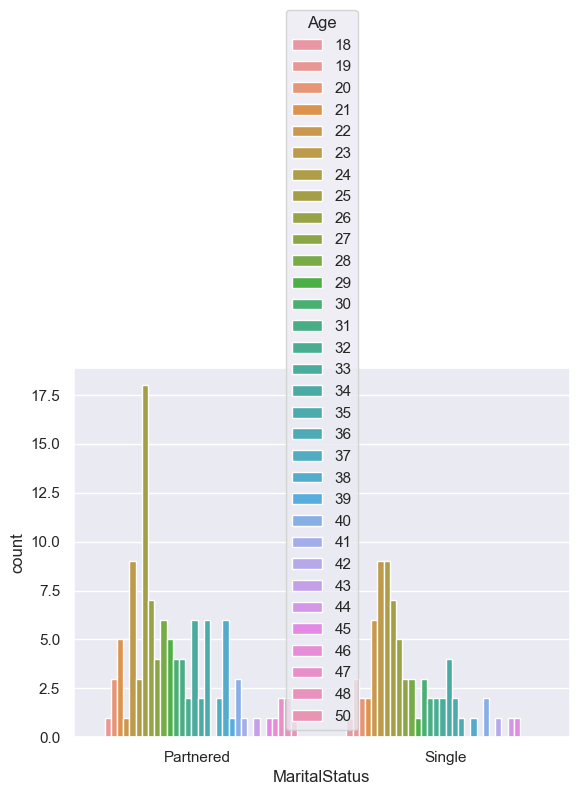

In [28]:
#Countplot 
sns.countplot(x="MaritalStatus",hue="Age",data=df)
plt.show()


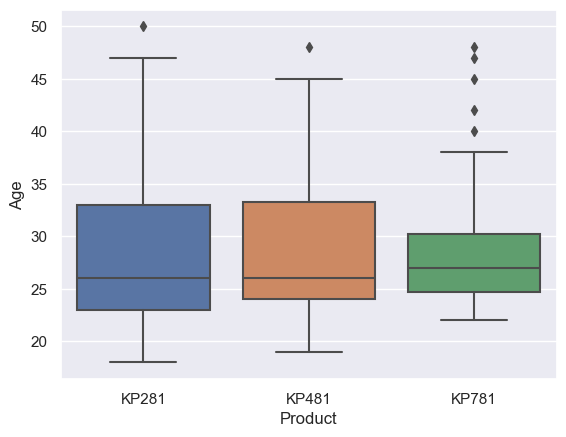

In [29]:
#Boxplot
sns.boxplot(x="Product",y="Age",data=df)
plt.show()

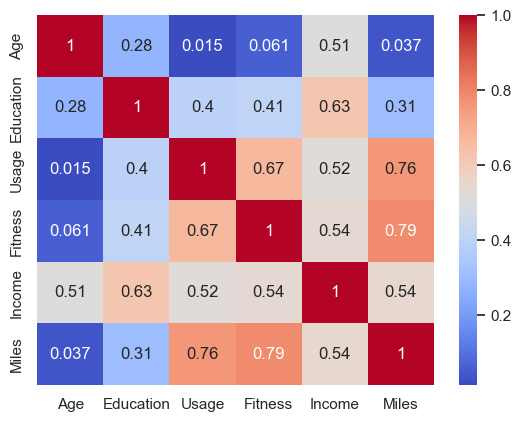

In [30]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.show()

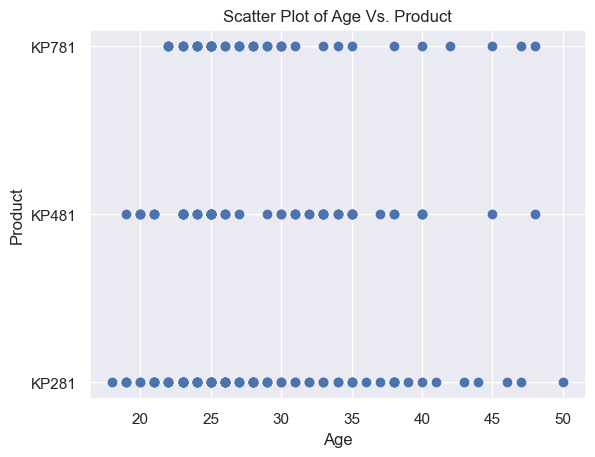

In [31]:
#Detect the outlier
Age=df["Age"]
Product=df["Product"]
plt.scatter(Age,Product)
plt.xlabel("Age")
plt.ylabel("Product")
plt.title("Scatter Plot of Age Vs. Product")
plt.show()

In [32]:
# Missing Values:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [33]:
# Marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

# By using crosstab
crosstab=pd.crosstab(index=df["Product"],columns="count",normalize="columns")*100
crosstab.rename(columns={"count":"Percentage"},inplace=True)
crosstab

col_0,Percentage
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


In [34]:
# What is the probability of a male customer buying a KP781 treadmill?
#Total Customers
Total_customers=len(df)
Total_customers

180

In [35]:
# What is the probability of a male customer buying a KP781 treadmill?

In [36]:
Male_customers=len(df[df["Gender"]=="Male"])
KP281_purchased=len(df[(df["Gender"]=="Male")&(df["Product"]=="KP281")])
#Probability of a male customer buying a KP281 treadmill
Probability=KP281_purchased/Male_customers
"Probability of a male customer buying a KP281 treadmill:",Probability

('Probability of a male customer buying a KP281 treadmill:',
 0.38461538461538464)

In [37]:
Male_customers=len(df[df["Gender"]=="Male"])
KP481_purchased=len(df[(df["Gender"]=="Male")&(df["Product"]=="KP481")])
#Probability of a male customer buying a KP481 treadmill
Probability=KP481_purchased/Male_customers
"Probability of a male customer buying a KP481 treadmill:",Probability

('Probability of a male customer buying a KP481 treadmill:',
 0.2980769230769231)

In [38]:
Male_customers=len(df[df["Gender"]=="Male"])
KP781_purchased=len(df[(df["Gender"]=="Male")&(df["Product"]=="KP781")])
#Probability of a male customer buying a KP781 treadmill
Probability=KP781_purchased/Male_customers
"Probability of a male customer buying a KP781 treadmill:",Probability

('Probability of a male customer buying a KP781 treadmill:',
 0.3173076923076923)

In [39]:
Female_customers=len(df[df["Gender"]=="Female"])
KP281_purchased=len(df[(df["Gender"]=="Female")&(df["Product"]=="KP281")])
#Probability of a female customer buying a KP281 treadmill
Probability=KP281_purchased/Female_customers
"Probability of a female customer buying a KP281 treadmill:",Probability

('Probability of a female customer buying a KP281 treadmill:',
 0.5263157894736842)

In [40]:
Female_customers=len(df[df["Gender"]=="Female"])
KP481_purchased=len(df[(df["Gender"]=="Female")&(df["Product"]=="KP481")])
#Probability of a female customer buying a KP481 treadmill
Probability=KP481_purchased/Female_customers
"Probability of a female customer buying a KP481 treadmill:",Probability

('Probability of a female customer buying a KP481 treadmill:',
 0.3815789473684211)

In [41]:
Female_customers=len(df[df["Gender"]=="Female"])
KP781_purchased=len(df[(df["Gender"]=="Female")&(df["Product"]=="KP781")])
#Probability of a female customer buying a KP781 treadmill
Probability=KP781_purchased/Female_customers
"Probability of a female customer buying a KP781 treadmill:",Probability

('Probability of a female customer buying a KP781 treadmill:',
 0.09210526315789473)

In [42]:
#Create a contigency table

contigency_table=pd.crosstab(df["Gender"],df["MaritalStatus"],margins=True)
contigency_table

MaritalStatus,Partnered,Single,All
Gender,,,
Female,46,30,76
Male,61,43,104
All,107,73,180


In [43]:
pd.crosstab(df["Gender"],df["Product"])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [44]:
#Compute Marginal Probabilities
marginal_gender=df["Gender"].value_counts()/len(df)
marginal_gender

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [45]:
#Conditional Probability
conditional_tab=contigency_table.div(contigency_table.sum(axis=0),axis=1)
conditional_tab

MaritalStatus,Partnered,Single,All
Gender,,,
Female,0.214953,0.205479,0.211111
Male,0.285047,0.294521,0.288889
All,0.500000,0.500000,0.500000


In [47]:
#Insights based on non-graphical and visual analysis :

1. In KP281 wide range of customers ages vary between 20 to 40.
2. In this dataset ,a wide range of revenue indicate variability in sales from KP281 product.
3. Partner customers have more purchased products compared to single customers.
4. In product KP781 the female customer segment accounts for a relatively smaller share compared to the male customer.
5. Probability of the product purchase depends on the customers age and gender.

In [ ]:
# Recommendations:

1. Here female customer segment is lower than male customer so we should focus on increasing it.
2. We should make some strategies for enhance of product KP781,because it is lower compared to another products.
3. KP781 is much higher compared to KP281 and KP481, so we can reduce some amount from selling price to attract the customers.